# Model developement to predict the rating (user review) of a movie: part-II (applying PCA, 5 components)

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
# Import the datasets
IMDB_only = pd.read_csv('pre-processed_dataset/IMDB_only.csv', index_col = 0)
IMDB_Kaggle_common = pd.read_csv('pre-processed_dataset/IMDB_Kaggle_common.csv', index_col = 0)

In [3]:
IMDB_only.shape, IMDB_Kaggle_common.shape

((69458, 1089), (2585, 1089))

In [4]:
y = IMDB_only['avg_vote']
X = IMDB_only.drop(columns = 'avg_vote')

In [5]:
print(X.shape)
print(y.shape)

(69458, 1088)
(69458,)


## Train test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(48620, 1088)
(20838, 1088)


## PCA (Principal Component Analysis) application

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca1 = pca.fit(X_train)
pca1_train = pca1.transform(X_train)
pca1_test = pca1.transform(X_test)
print(pca1.explained_variance_ratio_)

[0.30476809 0.16820868 0.05150449 0.04209438 0.0350429 ]


### Simple Linear Regression

In [8]:
lr = LinearRegression()
lr.fit(pca1_train, y_train)
y_train_predict = lr.predict(pca1_train)
y_test_predict = lr.predict(pca1_test)

In [9]:
np.max(y_train_predict), np.max(y_test_predict)

(8.42473528628864, 8.40318046643136)

In [10]:
lr.intercept_, sorted(lr.coef_)[:10]

(5.914574249280131,
 [-0.29948791550793485,
  -0.2869641102180291,
  0.22623318606771478,
  0.35827750741880865,
  0.8636425045268534])

In [11]:
r2_score(y_train, y_train_predict), r2_score(y_test, y_test_predict)

(0.2773175223821157, 0.291981410334871)

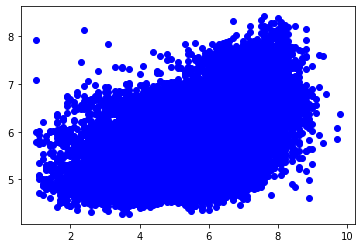

In [32]:
#plot the y_test and y_predict
plt.scatter(y_train,y_train_predict,  color = 'b')
plt.show()

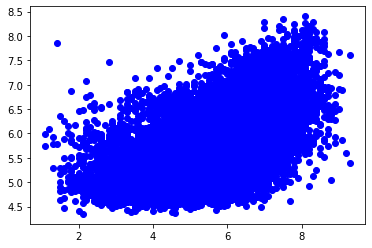

In [33]:
#plot the y_test and y_predict
plt.scatter(y_test,y_test_predict,  color = 'b')
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
print("The mean squared error:", mean_squared_error(y_test, y_test_predict))

from sklearn.metrics import mean_squared_error
print("The root mean squared error:", mean_squared_error(y_test, y_test_predict, squared = False))

from sklearn.metrics import mean_absolute_error
print("The mean absolute error:", mean_absolute_error(y_test, y_test_predict))

The mean squared error: 1.0372697394629364
The root mean squared error: 1.0184644026488783
The mean absolute error: 0.7888553980176751


**With PCA, the simple linear regression model performance seems resonable in comparision to without PCA. The y_predict_test values are upto 10 (which were much higher in without PCA case) and the model performance has improved.**

### Lasso Linear Regression

In [15]:
alpha = [0.01, 0.1, 1, 10]
for alp in alpha:
    lasso1 = Lasso(alpha=alp)
    lasso1.fit(pca1_train, y_train)
    y_train_predict1 = lasso1.predict(pca1_train)
    y_test_predict1 = lasso1.predict(pca1_test)
    print(alp)
    print(r2_score(y_train, y_train_predict1))
    print(r2_score(y_test, y_test_predict1))

0.01
0.27638935184990054
0.29067833702794477
0.1
0.20527176991745766
0.21485845295540684
1
0.0
-0.00026864922856795204
10
0.0
-0.00026864922856795204


In [16]:
alpha2 = [0.01, 0.1, 1]
for alp2 in alpha2:
    Rge = Ridge(alpha=alp2)
    Rge.fit(pca1_train, y_train)
    y_train_predict2 = Rge.predict(pca1_train)
    y_test_predict2 = Rge.predict(pca1_test)
    print(alp2)
    print(r2_score(y_train, y_train_predict2))
    print(r2_score(y_test, y_test_predict2))
    print(np.max(y_test_predict2))

0.01
0.2773175223820008
0.29198140925530913
8.403179224154929
0.1
0.2773175223706268
0.2919813995286813
8.403168043754413
1
0.2773175212333958
0.2919813012161532
8.40305624839809


In [17]:
# Applying GridSearchCV
Rge3 = Ridge()
alpha = [0.01, 0.1, 1]
parameters = {'alpha': alpha}
rge3_grid = GridSearchCV(Rge3, param_grid = parameters, scoring = 'r2', cv = 5)
rge3_grid.fit(pca1_train, y_train)

print(rge3_grid.best_score_)
print(rge3_grid.best_params_)

0.276823663414554
{'alpha': 1}


In [18]:
# Applying RandomizedSearchCV
Rge4 = Ridge()
alpha4 = {'alpha': np.linspace(0.01, 10, 4)} 
Rge4_random = RandomizedSearchCV(Rge4, param_distributions = alpha4, cv = 5)
Rge4_random.fit(pca1_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': array([ 0.01,  3.34,  6.67, 10.  ])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [19]:
print(Rge4_random.best_score_)
print(Rge4_random.best_params_)

0.2768236592595113
{'alpha': 0.01}


 **Note: The regression model (Simple linear Regression, Lasso, Ridge), none give a good r2 score (values in all cases around <0.15). Hence, it is better to try the other regressor model.**

# Model optimization

# Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state = 42)
regr.fit(pca1_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [21]:
y_predict3 = regr.predict(pca1_test)

In [22]:
r2_score(y_test, y_predict3)

0.34557536902836794

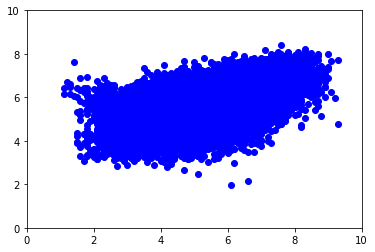

In [23]:
plt.scatter(y_test, y_predict3, color = 'b')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.show()

In [24]:
regr2 = RandomForestRegressor(n_estimators=150, random_state = 42)
regr2.fit(pca1_train, y_train)
y_predict4 = regr2.predict(pca1_test)
r2_score(y_test, y_predict4)

0.3473597160385774

**Note: From above, it can be concluded that the Random Forest Regressor model performance is better than Linear Regresson model, though one can not rely on the model performance as the r2 score very low. We need to improve this.** 

# Gradient boosting 

In [25]:
def opt_gradientboosting(learning_rate, n_estimator, max_features, max_depth):
    for rate in learning_rate:
        gb = GradientBoostingRegressor(learning_rate = rate, n_estimators = n_estimator,  max_features = max_features, max_depth = max_depth)
        gb.fit(pca1_train, y_train)
        y_gb_predict = gb.predict(pca1_test)
        score_1 = r2_score(y_test,y_gb_predict)
        print(rate)
        print(score_1)
    return print('End')

In [26]:
learning_rate = [0.1, 1, 1.5, 2]

opt_gradientboosting(learning_rate, 10, 3, 3)

0.1
0.2503501845788231
1
0.34295315101694324
1.5
0.31188019558790914
2
-0.00799030243879817
End


In [27]:
gbr2 = GradientBoostingRegressor()
learning_rate = [0.1, 1]
n_estimators = [50, 100, 200]
max_features = [3, 5]
max_depth = [3, 5]
parameters = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth}
grid_search2 = GridSearchCV(estimator = gbr2, param_grid = parameters, scoring = 'r2', cv = 5 )

grid_search2.fit(pca1_train, y_train)

print(grid_search2.best_score_)
print(grid_search2.best_params_)

0.364108183458857
{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 5, 'n_estimators': 200}


**Though RandomizedSearchCV and GridSearchCV are good practices for best hyperparameter search, run-time was extremely high in a personal computer in this case. Hence it was carried out in steps in the following cells:**

In [28]:
gbr4 = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 300, max_features= 5, max_depth = 5)
gbr4.fit(pca1_train, y_train)
y_train_predict4 = gbr4.predict(pca1_train)
y_test_predict4 = gbr4.predict(pca1_test)
score_1 = r2_score(y_test,y_test_predict4)
print(score_1)

0.3782360554421973


In [29]:
gbr4 = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 500, max_features= 5, max_depth = 5)
gbr4.fit(pca1_train, y_train)
y_train_predict4 = gbr4.predict(pca1_train)
y_test_predict4 = gbr4.predict(pca1_test)
score_1 = r2_score(y_test,y_test_predict4)
print(score_1)

0.37600812723758603


# Summary:

**PCA was applied, and only 5 features were considered for regression models development.Though it helped to build a resonable Simple Linear Regression model, its performance was poor. It also didn't improve the performance of Random Forest Regressor or Greadient Boosting in comparision to without PCA.**<br><br>
**Additional note:** <br> So as a further attempt to improve the models performance,  default PCA was applied, which has been discussed in model development part-III of the project. 